# Data Analysis

Energy, time and power graphs.

In [ ]:
# Importing csv file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [2]:
# Main libs for data visualization
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_filepath = '/content/drive/MyDrive/GAP8_Analysis/preprocessed_data/processed_data.csv'
data = pd.read_csv(data_filepath)
data.head()

voltage  set_freq  meas_freq  ...  avg_voltage    diff  freq_diff
0     1050  40000000   40927232  ...     2.826790 -927232    -927232
1     1050  40000000   40271872  ...     2.826798 -271872    -271872
2     1050  40000000   40108032  ...     2.826901 -108032    -108032
3     1050  40000000   39059456  ...     2.826888  940544     940544
4     1050  40000000   39485440  ...     2.826897  514560     514560

[5 rows x 18 columns]

# Gráficos Estáticos

No handles with labels found to put in legend.


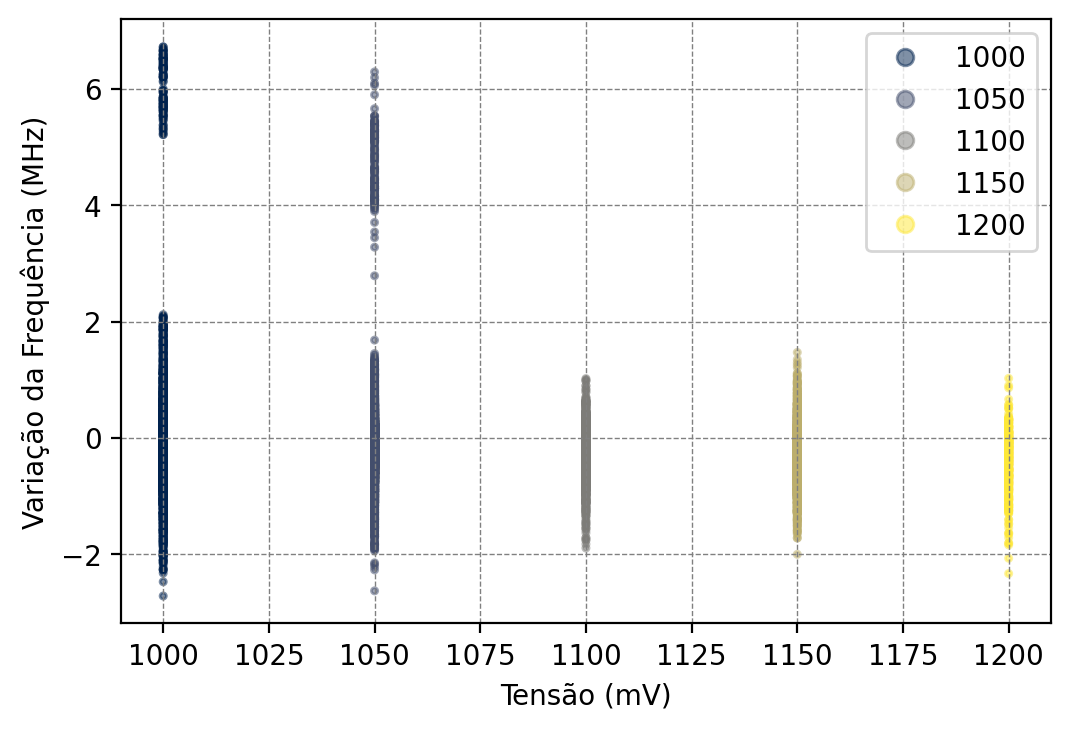

In [4]:
# Frequency variation by voltage. This variation is calculated subtracting the measured frequency from the set frequency.
plt.figure(dpi=200)

legend_values = sorted(list(data['voltage'].unique()))

scatter = plt.scatter(data['voltage'], data['diff']/1000000, s=5, c=data['voltage'], cmap='cividis', alpha=0.5)
plt.xlabel("Tensão (mV)")
plt.ylabel("Variação da Frequência (MHz)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

No handles with labels found to put in legend.


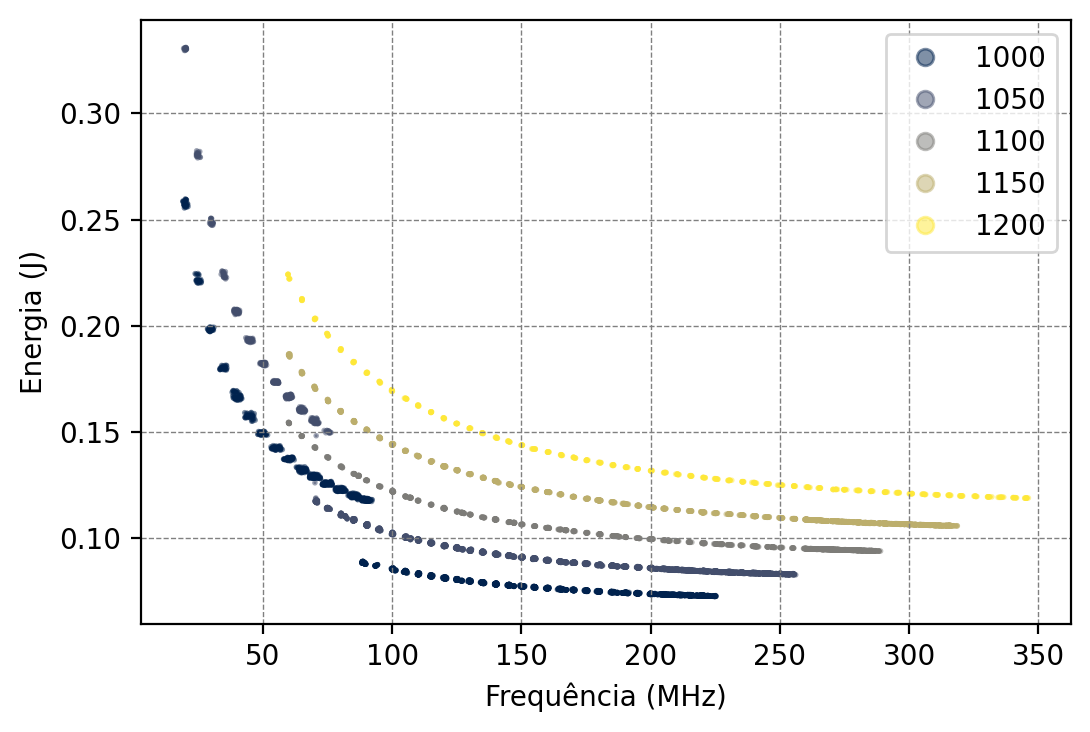

In [38]:
# Energy measured by frequency measured
plt.figure(dpi=200)

legend_values = sorted(list(data['voltage'].unique()))

plt.scatter(data['meas_freq']/1000000, data['energy'], s=1, c=data['voltage'], cmap='cividis', alpha=0.5)

plt.xlabel("Frequência (MHz)")
plt.ylabel("Energia (J)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

We noticed that were a little gap in the energy measurement in the first two voltages (1000 mV and 1050 mV). \
To verify this we made same graph but also marking the down and upper frequency limits for each voltage (the initial 1000 mV is on 87MHz and the last one 1200 mV is on 170MHz).

In [30]:
# Generating simple dataframes with filtered frequencies around the max points
data_87mhz = data[(data['set_freq'] > 80000000) & (data['set_freq'] < 90000000)]
data_170mhz = data[(data['set_freq'] > 165000000) & (data['set_freq'] < 175000000)]

No handles with labels found to put in legend.


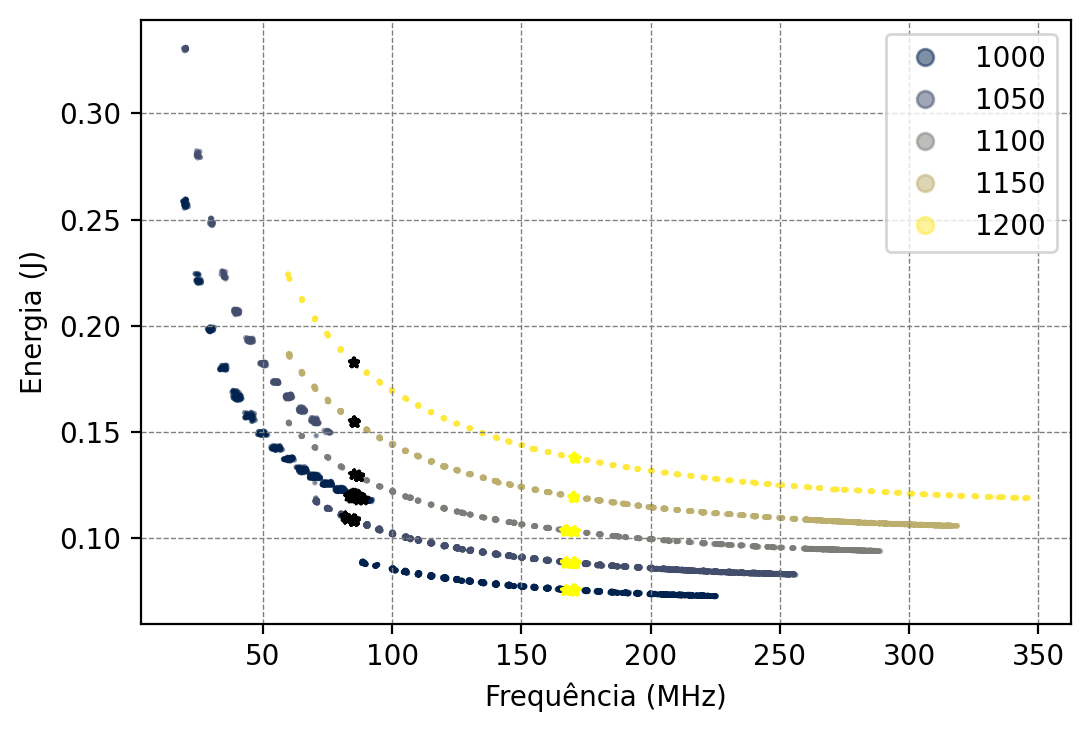

In [61]:
# Redoing the graph with the max points
plt.figure(dpi=200)

legend_values = sorted(list(data['voltage'].unique()))

plt.scatter(data['meas_freq']/1000000, data['energy'], s=1, c=data['voltage'], cmap='cividis', alpha=0.5)
plt.scatter(data_87mhz['meas_freq']/1000000, data_87mhz['energy'], s=10, c='black', alpha=1, marker='*')
plt.scatter(data_170mhz['meas_freq']/1000000, data_170mhz['energy'], s=10, c='yellow', alpha=1, marker='*')
# The colors wre choosen to combine with the voltage legend

plt.xlabel("Frequência (MHz)")
plt.ylabel("Energia (J)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

In [66]:
# Time measured by frequency measured
plt.figure(dpi=200)

legend_values = sorted(list(data['voltage'].unique()))

plt.scatter(data['meas_freq']/1000000, data['time'], s=1, c=data['voltage'], cmap='cividis', alpha=0.5)
plt.xlabel("Frequência (MHz)")
plt.ylabel("Tempo (s)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

No handles with labels found to put in legend.


In [70]:
# Power measured by frequency measured
plt.figure(dpi=200)

legend_values = sorted(list(data['voltage'].unique()))

plt.scatter(data['meas_freq']/1000000, data['avg_power'], s=1, c=data['voltage'], cmap='cividis', alpha=0.5)
plt.xlabel("Frequência (MHz)")
plt.ylabel("Potência (W)")

plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

No handles with labels found to put in legend.


For this work, it is important to analyze the efficiency of the tests for the 1V voltage, as it is the lowest.

In [71]:
# Creating 1V dataframe
data_1V = data[data['voltage'] == 1000]

No handles with labels found to put in legend.


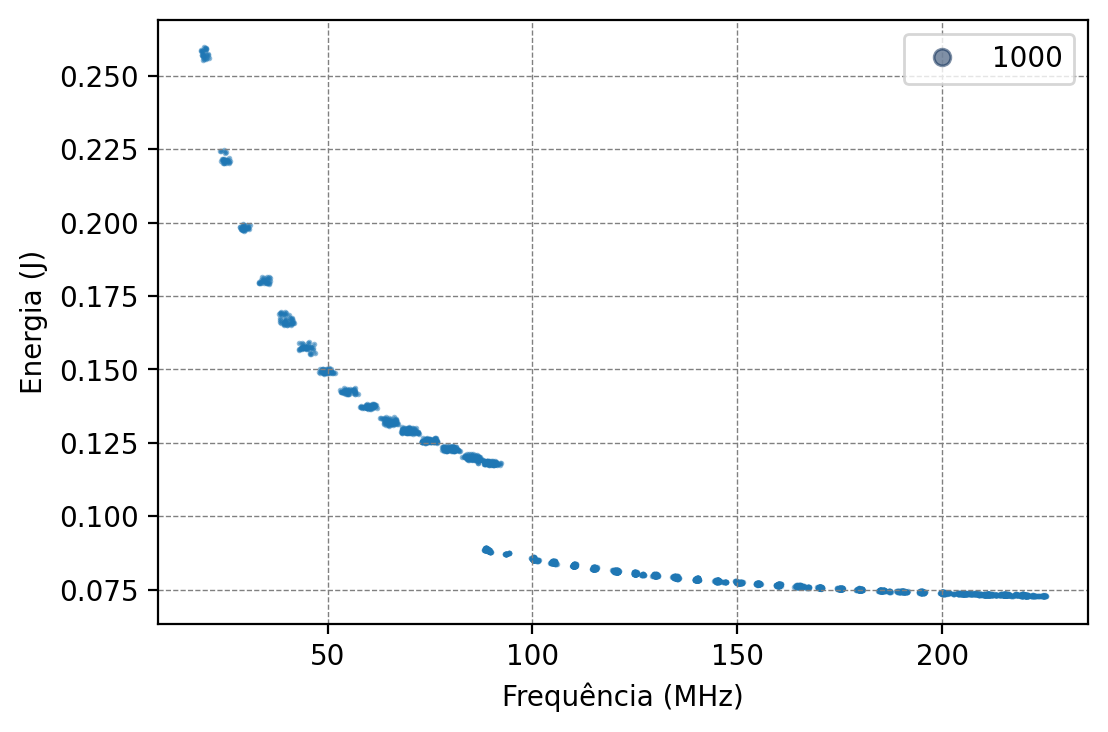

In [76]:
# Energy measured by frequency measured at 1V
plt.figure(dpi=200)

legend_values = sorted(list(data_1V['voltage'].unique()))

plt.scatter(data_1V['meas_freq']/1000000, data_1V['energy'], s=1, alpha=0.5)
plt.xlabel("Frequência (MHz)")
plt.ylabel("Energia (J)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

No handles with labels found to put in legend.


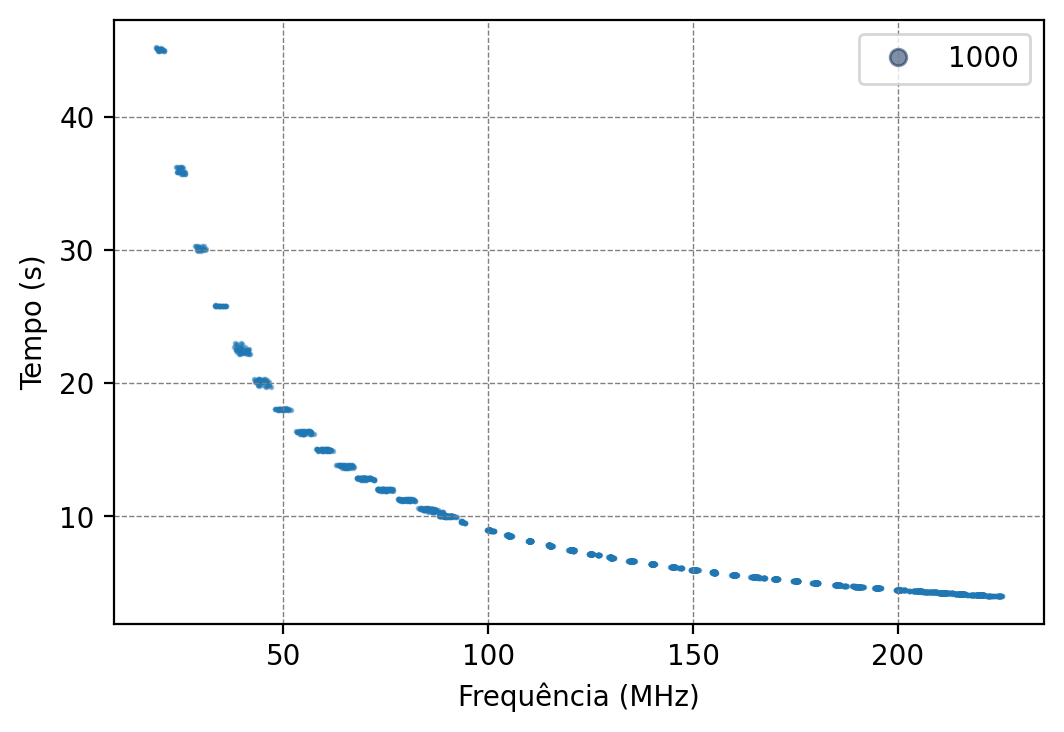

In [78]:
# Time measured by frequency measured at 1V
plt.figure(dpi=200)

legend_values = sorted(list(data_1V['voltage'].unique()))

plt.scatter(data_1V['meas_freq']/1000000, data_1V['time'], s=1, alpha=0.5)
plt.xlabel("Frequência (MHz)")
plt.ylabel("Tempo (s)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

No handles with labels found to put in legend.


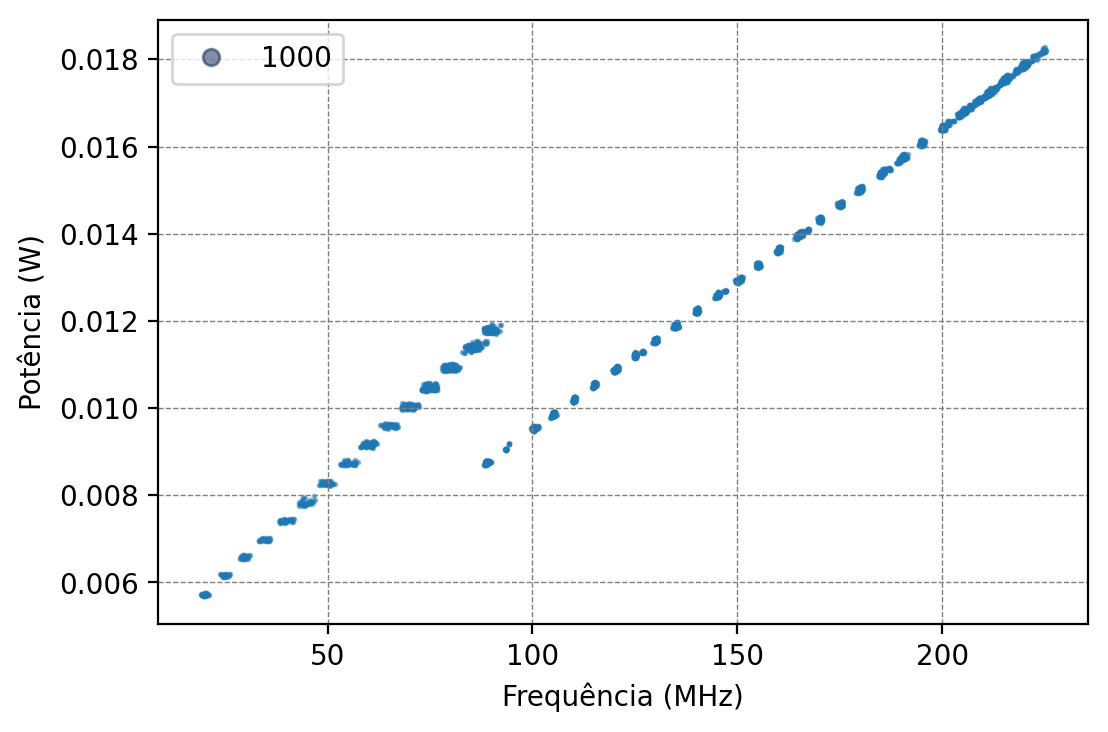

In [80]:
# Power measured by frequency measured at 1V
plt.figure(dpi=200)

legend_values = sorted(list(data_1V['voltage'].unique()))

plt.scatter(data_1V['meas_freq']/1000000, data_1V['avg_power'], s=1, alpha=0.5)
plt.xlabel("Frequência (MHz)")
plt.ylabel("Potência (W)")
plt.legend(loc='upper left')
plt.legend(handles=scatter.legend_elements()[0], labels=legend_values)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()

# Gráficos Interativos

The interactive graphics below are the same as the static ones plotted above. This is just to view the point values with the cursor.

In [83]:
fig = px.scatter(data, x="meas_freq", y="energy", color="voltage", hover_data=['time'], template="simple_white", title='Energia x Frequência - Testes 100k',
                 labels={
                     "meas_freq": "Frequência (Hz)",
                     "energy": "Energia (J)",
                     "voltage": "Tensão (mV)"
                 },)
fig.show()

In [84]:
fig = px.scatter(data, x="meas_freq", y="time", color="voltage", hover_data=['time'], template="simple_white", title='Tempo x Frequência - Testes 100k',
                 labels={
                     "meas_freq": "Frequência (Hz)",
                     "time": "Tempo (s)",
                     "voltage": "Tensão (mV)"
                 },)
fig.show()

In [85]:
fig = px.scatter(data, x="meas_freq", y="avg_power", color="voltage", hover_data=['time'], template="simple_white", title='Potência x Frequência - Testes 100k',
                 labels={
                     "meas_freq": "Frequência (Hz)",
                     "avg_power": "Potência (W)",
                     "voltage": "Tensão (mV)"
                 },)
fig.show()

In [95]:
# 3d visualization of measurements
fig = px.scatter_3d(data, x="meas_freq", y="voltage", z="energy", color="voltage", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"},title="Energia x Frequência x Tensão")
fig.show()